In [1]:
import os

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall

from jres import j_resnet
from se_resnet import j_resnet_se
from utility import show_plot, get_f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import add, multiply, Concatenate, Dense, Dropout, Flatten, Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization, ReLU

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# directory
train_dir='./OCT2017_/train/'
test_dir='./OCT2017_/test/'
val_dir='./OCT2017_/val/'

In [3]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0)
tra_generator=img_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=500,\
                                               class_mode='categorical', interpolation='bilinear')
val_generator=img_gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=1,\
                                               class_mode='categorical', interpolation='bilinear')
tst_generator=img_gen.flow_from_directory(test_dir,target_size=(224,224),batch_size=50,\
                                               class_mode='categorical', interpolation='bilinear')

Found 59142 images belonging to 4 classes.
Found 8446 images belonging to 4 classes.
Found 16896 images belonging to 4 classes.


In [4]:
ep = 30
early_terminate = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=ep//4, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [17]:
model = Sequential()
model.add(Conv2D(10, kernel_size=(7,7), strides=2, padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(7, kernel_size=(3,3), strides=1, padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall()])
history = model.fit_generator(tra_generator,validation_data = val_generator, epochs=6, verbose=2)
score = model.evaluate(x=tst_generator)
f1 = get_f1_score(score[2], score[3])
print('f1 {}, score {}'.format(f1, score))

  ...
    to  
  ['...']
Train for 119 steps, validate for 8446 steps
Epoch 1/6
119/119 - 439s - loss: 1.2844 - accuracy: 0.4729 - precision_4: 0.5904 - recall_4: 0.2047 - val_loss: 1.1299 - val_accuracy: 0.5437 - val_precision_4: 0.6926 - val_recall_4: 0.2942
Epoch 2/6


KeyboardInterrupt: 

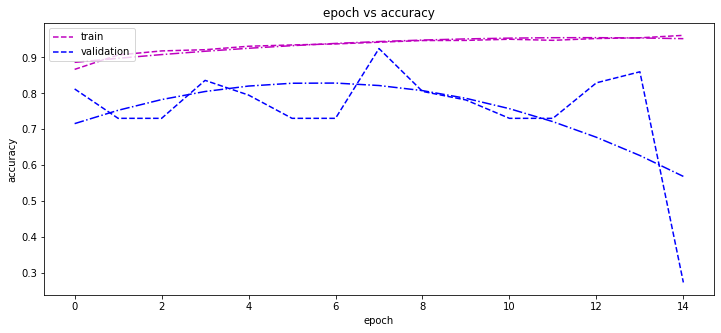

In [6]:
show_plot(history.history, 'accuracy', 'val_accuracy')

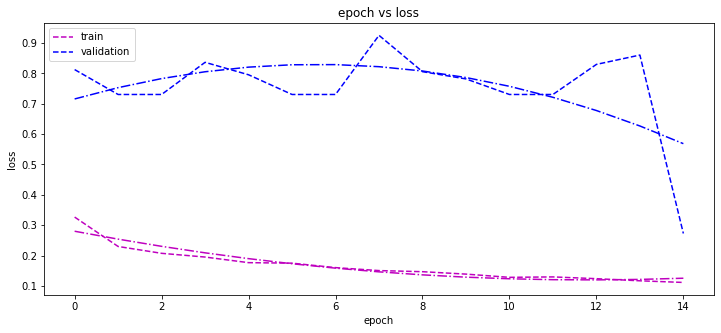

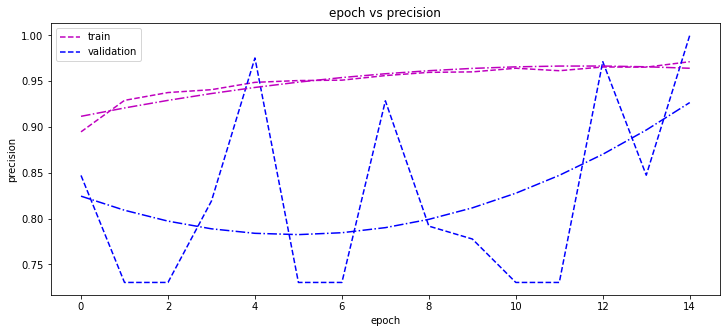

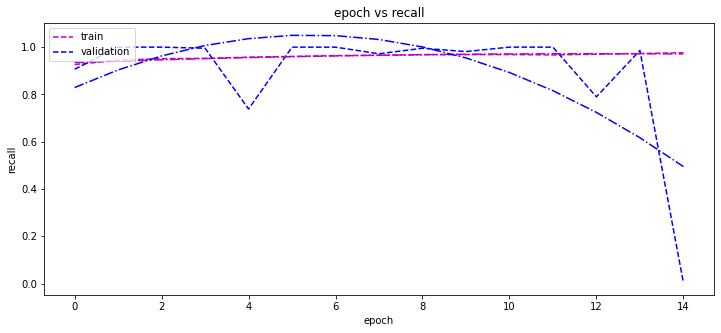

In [7]:
show_plot(history.history, 'loss', 'val_accuracy')
show_plot(history.history, 'precision', 'val_precision')
show_plot(history.history, 'recall', 'val_recall')

In [3]:
ep = 100
early_terminate = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=ep//4, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0)
tra_generator=img_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=100,\
                                               class_mode='categorical', interpolation='bilinear')
val_generator=img_gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=1,\
                                               class_mode='categorical', interpolation='bilinear')
tst_generator=img_gen.flow_from_directory(test_dir,target_size=(224,224),batch_size=50,\
                                               class_mode='categorical', interpolation='bilinear')
resnet = j_resnet_se(k=32, label_size=4, output_activation='sigmoid')
resnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall()])
history = resnet.fit_generator(tra_generator,validation_data = val_generator, epochs=ep, verbose=2, callbacks=[early_terminate])
score = resnet.evaluate(x=tst_generator)
f1 = get_f1_score(score[2], score[3])
print('f1 {}, score {}'.format(f1, score))

Found 59142 images belonging to 4 classes.
Found 8446 images belonging to 4 classes.
Found 16896 images belonging to 4 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 592 steps, validate for 8446 steps
Epoch 1/100
592/592 - 276s - loss: 0.3880 - accuracy: 0.8602 - precision: 0.9146 - recall: 0.3717 - val_loss: 2.5338 - val_accuracy: 0.3735 - val_precision: 0.3224 - val_recall: 0.1368
Epoch 2/100


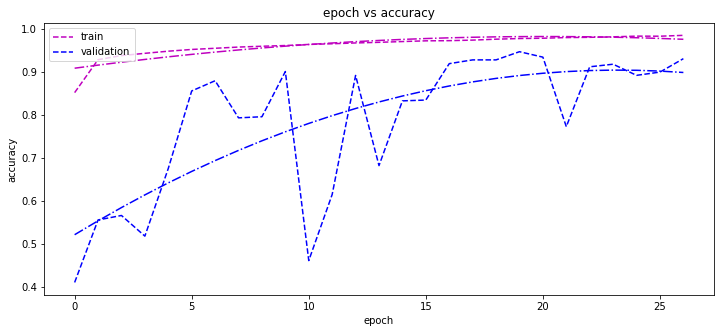

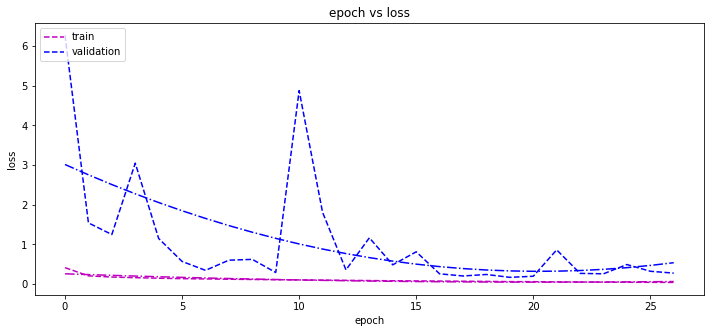

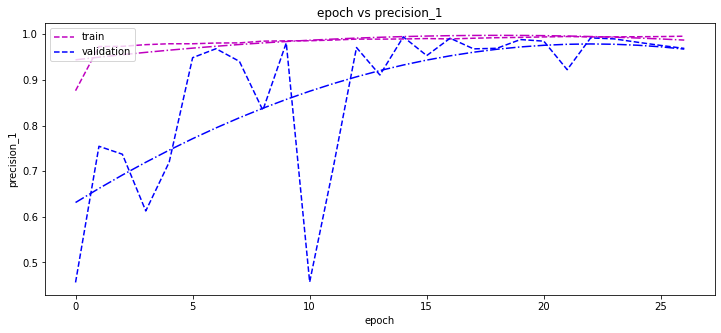

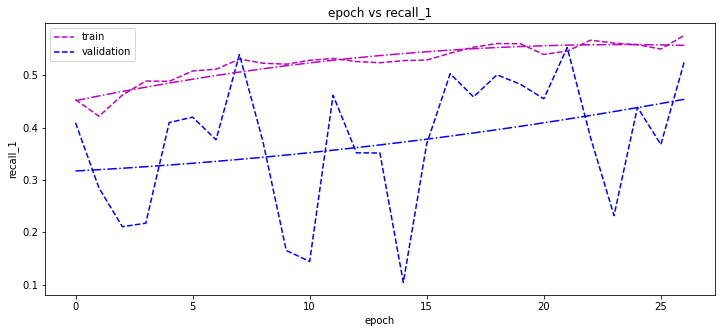

In [6]:
show_plot(history.history, 'accuracy', 'val_accuracy')
show_plot(history.history, 'loss', 'val_loss')
show_plot(history.history, 'precision_1', 'val_precision_1')
show_plot(history.history, 'recall_1', 'val_recall_1')

In [7]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0)
tra_generator=img_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=50,\
                                               class_mode='categorical', interpolation='bilinear')
val_generator=img_gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=10,\
                                               class_mode='categorical', interpolation='bilinear')
tst_generator=img_gen.flow_from_directory(test_dir,target_size=(224,224),batch_size=10,\
                                               class_mode='categorical', interpolation='bilinear')
resnet = j_resnet(k=32, label_size=4, output_activation='sigmoid')
resnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall()])
history = resnet.fit_generator(tra_generator,validation_data = val_generator, epochs=ep, verbose=0, callbacks=[early_terminate])
score = resnet.evaluate(x=tst_generator)
f1 = get_f1_score(score[2], score[3])
print('f1 {}, score {}'.format(f1, score))

Found 59142 images belonging to 4 classes.
Found 8446 images belonging to 4 classes.
Found 16896 images belonging to 4 classes.
  ...
    to  
  ['...']


KeyboardInterrupt: 

In [11]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0)
tra_generator=img_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=10,\
                                               class_mode='binary', interpolation='bilinear')
val_generator=img_gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=1,\
                                               class_mode='binary', interpolation='bilinear')
tst_generator=img_gen.flow_from_directory(test_dir,target_size=(224,224),batch_size=1,\
                                               class_mode='binary', interpolation='bilinear')
resnet = j_resnet(k=32, label_size=1, output_activation='sigmoid')
resnet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall()])
history = resnet.fit_generator(tra_generator,validation_data = val_generator, epochs=ep, verbose=0, callbacks=[early_terminate])
score = resnet.evaluate(x=tst_generator)
f1 = get_f1_score(score[2], score[3])
print('f1 {}, score {}'.format(f1, score))

Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [==============================] - 8s 13ms/step - loss: 0.1521 - accuracy: 0.9316 - precision_3: 0.9553 - recall_3: 0.9508
f1 0.9530516067839417, score [0.15213523641758325, 0.93162394, 0.95529413, 0.9508197]


In [12]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0)
tra_generator=img_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=10,\
                                               class_mode='binary', interpolation='bilinear')
val_generator=img_gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=1,\
                                               class_mode='binary', interpolation='bilinear')
tst_generator=img_gen.flow_from_directory(test_dir,target_size=(224,224),batch_size=1,\
                                               class_mode='binary', interpolation='bilinear')
resnet = j_resnet(k=32, label_size=1, output_activation='sigmoid')
resnet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall()])
history = resnet.fit_generator(tra_generator,validation_data = val_generator, epochs=ep, verbose=0, callbacks=[early_terminate])
score = resnet.evaluate(x=tst_generator)
f1 = get_f1_score(score[2], score[3])
print('f1 {}, score {}'.format(f1, score))

Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [==============================] - 8s 14ms/step - loss: 0.0807 - accuracy: 0.9726 - precision_4: 0.9881 - recall_4: 0.9742
f1 0.9811320834949986, score [0.08071938744420208, 0.9726496, 0.98812354, 0.9742389]


In [5]:
k_list = [48, 64, 80]
for ks in k_list:
    score_board = []
    for j in range(5):
        img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0)
        tra_generator=img_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=10,\
                                                       class_mode='binary', interpolation='bilinear')
        val_generator=img_gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=1,\
                                                       class_mode='binary', interpolation='bilinear')
        tst_generator=img_gen.flow_from_directory(test_dir,target_size=(224,224),batch_size=1,\
                                                       class_mode='binary', interpolation='bilinear')
        resnet = j_resnet(k=ks, label_size=1, output_activation='sigmoid')
        resnet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall()])
        resnet.fit_generator(tra_generator,validation_data = val_generator, epochs=ep, verbose=0, callbacks=[early_terminate])
        score = resnet.evaluate(x=tst_generator)
        f1 = get_f1_score(score[2], score[3])
        print('f1 {}, score {}'.format(f1, score))
    print('{} -> {}'.format(ks, np.mean(score_board)))
    print('===============================================')

Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [==============================] - 8s 13ms/step - loss: 1.2017 - accuracy: 0.7556 - precision: 0.9965 - recall: 0.6674
f1 0.7994389833496809, score [1.201715636330116, 0.75555557, 0.9965035, 0.6674473]
Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [==============================] - 8s 13ms/step - loss: 0.1378 - accuracy: 0.9504 - precision_1: 0.9585 - recall_1: 0.9742: 5s - - ETA: 1s - loss: 0.1431 - accuracy: 0.9480 - precisi
f1 0.9663181893373067, score [0.13778124475314968, 0.95042735, 0.95852536, 0.9742389]
Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 

C:\Users\AI-lab\anaconda3\envs\vm_trial\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\AI-lab\anaconda3\envs\vm_trial\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [==============================] - ETA: 0s - loss: 0.3491 - accuracy: 0.8608 - precision_5: 1.0000 - recall_5: 0.809 - 8s 13ms/step - loss: 0.3475 - accuracy: 0.8615 - precision_5: 1.0000 - recall_5: 0.8103
f1 0.8952134916429901, score [0.34746652936140426, 0.86153847, 1.0, 0.81030446]
Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [==============================] - 8s 13ms/step - loss: 0.1597 - accuracy: 0.9436 - precision_6: 0.9713 - recall_6: 0.9508
f1 0.9609467099648719, score [0.159674412297467, 0.94358975, 0.97129184, 0.9508197]
Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [=

C:\Users\AI-lab\anaconda3\envs\vm_trial\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\AI-lab\anaconda3\envs\vm_trial\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [==============================] - 8s 13ms/step - loss: 0.2279 - accuracy: 0.8991 - precision_10: 0.8915 - recall_10: 0.9813
f1 0.9342251970107831, score [0.22792596803840923, 0.8991453, 0.8914894, 0.98126465]
Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [==============================] - 8s 13ms/step - loss: 0.1675 - accuracy: 0.9402 - precision_11: 0.9336 - recall_11: 0.9883
f1 0.960182039423598, score [0.16752856304057898, 0.94017094, 0.9336283, 0.98829037]
Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
585/585 [==============================] - 8s 13ms/step - loss: 0.2485 - accuracy: 0

C:\Users\AI-lab\anaconda3\envs\vm_trial\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\AI-lab\anaconda3\envs\vm_trial\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
from test_multi import test_se

img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0)
tra_generator=img_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=10,\
                                                       class_mode='binary', interpolation='bilinear')
val_generator=img_gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=1,\
                                                       class_mode='binary', interpolation='bilinear')
tst_generator=img_gen.flow_from_directory(test_dir,target_size=(224,224),batch_size=1,\
                                                       class_mode='binary', interpolation='bilinear')
resnet = test_se(k=10, label_size=1, output_activation='sigmoid')
resnet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall()])
resnet.fit_generator(tra_generator,validation_data = val_generator, epochs=5, verbose=1)
score = resnet.evaluate(x=tst_generator)
f1 = get_f1_score(score[2], score[3])
print('f1 {}, score {}'.format(f1, score))


Found 4978 images belonging to 2 classes.
Found 293 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 498 steps, validate for 293 steps
Epoch 1/5
498/498 [==============================] - 66s 133ms/step - loss: 0.4106 - accuracy: 0.8572 - precision: 0.8898 - recall: 0.9180 - val_loss: 0.2668 - val_accuracy: 0.9113 - val_precision: 0.9352 - val_recall: 0.9439.4510 - accuracy: 0.8442 - precisio - ETA: 8s - 
Epoch 2/5
498/498 [==============================] - 65s 130ms/step - loss: 0.2507 - accuracy: 0.9070 - precision: 0.9279 - recall: 0.9460 - val_loss: 0.2824 - val_accuracy: 0.8840 - val_precision: 0.8913 - val_recall: 0.9579ision: 0.9290 - r - ETA: 6s - loss: 0.2511 - accuracy: 0.9080 - pre - ETA: 2s - loss: 0.2528 - accuracy: 0.9065 - precision: 0.9273 - recall - ETA: 1s - loss: 0.2537 - accuracy: 0.9059 - precision: 0.9269 - r
Epoch 3/5
498/498 [====